In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [55]:
# load data
df = pd.read_csv('/Users/cristianmurillo/Documents/Data scientis /Machine learning models /Data_Sets/housing.csv')

In [56]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='longitude', ylabel='latitude'>

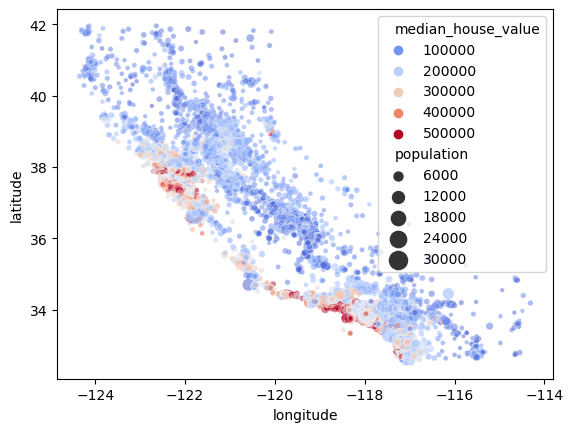

In [57]:
sns.scatterplot(x='longitude', y='latitude', data=df ,hue='median_house_value', palette='coolwarm',size='population',sizes=(10,200),alpha=0.5)

<Axes: xlabel='longitude', ylabel='latitude'>

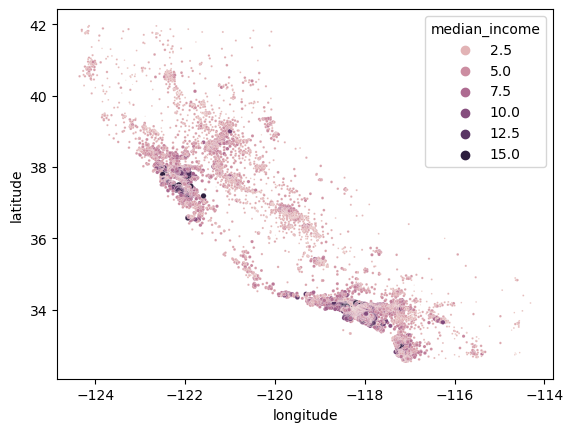

In [58]:
sns.scatterplot(x='longitude', y='latitude', data=df ,hue='median_income',s=df['median_income'])

In [59]:
from sklearn.cluster import KMeans
x = df.loc[:,['longitude','latitude','median_income']]
model = KMeans(n_clusters=6)
pred = model.fit_predict(x)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [60]:
x['seg_economic'] = pred
x.head()

,longitude,latitude,median_income,seg_economic
0,-122.23,37.88,8.3252,3
1,-122.22,37.86,8.3014,3
2,-122.24,37.85,7.2574,3
3,-122.25,37.85,5.6431,3
4,-122.25,37.85,3.8462,2


In [61]:
x['seg_economic'].value_counts()

seg_economic
1    7011
2    4876
4    3840
3    2771
0    1684
5     458
Name: count, dtype: int64

<Axes: xlabel='longitude', ylabel='latitude'>

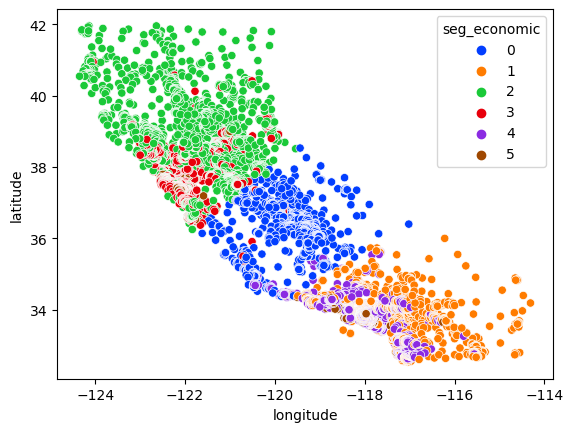

In [62]:
sns.scatterplot(x='longitude', y='latitude', data=x ,hue='seg_economic', palette='bright')

<Axes: xlabel='seg_economic', ylabel='count'>

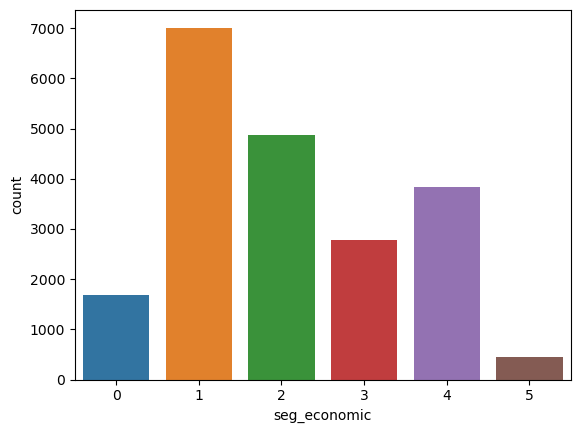

In [63]:
sns.countplot(x='seg_economic', data=x)

In [73]:
x.groupby('seg_economic').mean()

,longitude,latitude,median_income
seg_economic,,,
0,-119.727257,36.105160,2.668885
1,-117.829064,33.819304,2.873155
2,-121.891860,38.351637,2.822290
3,-121.967427,37.707665,5.518715
4,-118.027146,33.857372,5.516542
5,-119.340044,35.001223,10.950196


In [65]:
df['pop_per_household'] = df['population']/df['households']

In [74]:
x2 = df.loc[:,['longitude','latitude','pop_per_household']]
model2 = KMeans(n_clusters=3)
pred2 = model.fit_predict(x2)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [75]:
x2['predic_per_households'] = pred2
x2.head()

,longitude,latitude,pop_per_household,predic_per_households
0,-122.23,37.88,2.555556,3
1,-122.22,37.86,2.109842,3
2,-122.24,37.85,2.802260,3
3,-122.25,37.85,2.547945,3
4,-122.25,37.85,2.181467,3


<Axes: xlabel='longitude', ylabel='latitude'>

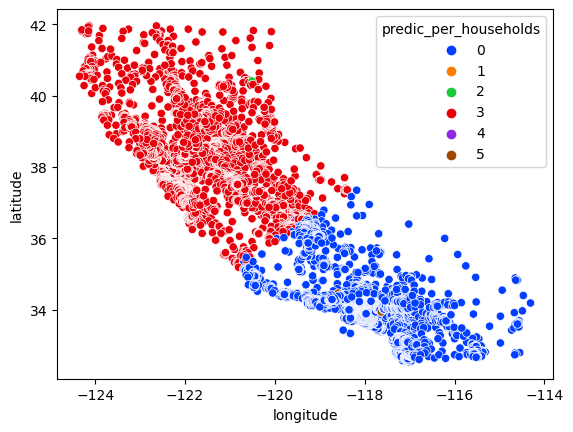

In [76]:
sns.scatterplot(x='longitude', y='latitude', data=x2 ,hue='predic_per_households', palette='bright')

In [78]:
x2['predic_per_households'].value_counts()

predic_per_households
0    11956
3     8675
5        5
2        2
4        1
1        1
Name: count, dtype: int64